<a href="https://colab.research.google.com/github/ashishkumarsaklani/Jam-project/blob/main/Jamboree_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

In [ ]:
url ='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'

df = pd.read_csv(url)
df = df.drop('Serial No.', axis=1)
#checking data
df.head().style.set_properties(**{'background':'black','border': '1.5px solid blue','color': 'red'})

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0,0.650000


#Select Features to Drop for testing

In [ ]:
df = df.drop('GRE Score', axis=1 )

In [ ]:
df = df.drop('TOEFL Score', axis=1 )

In [ ]:
df = df.drop('University Rating', axis=1)

In [ ]:
df = df.drop('SOP', axis=1 )

In [ ]:
df = df.drop('LOR ', axis=1 )

In [ ]:
df = df.drop('Research', axis=1 )

In [ ]:
df = df.drop('CGPA', axis=1 )

#Setting X and y

In [ ]:
#setting X and y

X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [ ]:
#checking data
df.head().style.set_properties(**{'background':'black','border': '1.5px solid blue','color': 'red'})

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,2,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,3,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,4,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,5,314,103,2,2.000000,3.000000,8.210000,0,0.650000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Checking for Multicollinearity
#correlation_matrix = df.drop('Chance of Admit ', axis=1).corr()
#print(correlation_matrix)

# Calculating VIF
#X_with_intercept = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            Variable          VIF
0         Serial No.     4.159745
1          GRE Score  1328.233222
2        TOEFL Score  1230.783122
3  University Rating    20.934147
4                SOP    36.155544
5               LOR     31.231834
6               CGPA   952.907558
7           Research     2.869689


In [ ]:
#spliting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.head()

,University Rating,LOR,CGPA,Research
361,4,3.5,9.54,1
73,4,4.0,9.04,1
374,2,2.5,7.65,0
155,3,3.0,8.69,0
104,3,3.0,9.05,1


In [ ]:
print(X_train.shape)
print(y_train.shape)

(400, 4)
(400,)


In [40]:
X.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'],
      dtype='object')

# Scatter plot for GRE Scores vs. Chance of Admit

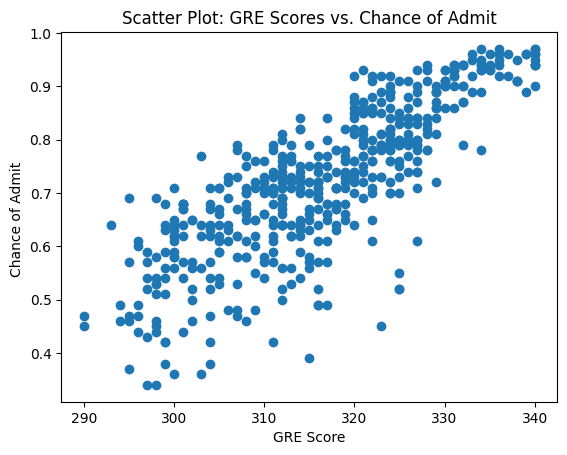

In [47]:

plt.scatter(df['GRE Score'], df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: GRE Scores vs. Chance of Admit')
plt.show()

# Repeat for other predictor variables

#Linear Regression model

In [39]:
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)



# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')


Mean Squared Error: 0.0034501347328912023
R-squared Value: 0.8312892551153447


#Linear model with Min Max Scaling

In [ ]:

# Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')
print(f'Mean Squared scaled Error: {mse_scaled}')
print(f'R-squared scaled Value: {r2_scaled}')

Mean Squared Error: 0.003430725951893191
R-squared Value: 0.8322383397607243
Mean Squared scaled Error: 0.0034501347328911984
R-squared scaled Value: 0.8312892551153448


#Polynomial model

In [ ]:

# Create polynomial feature transformer
poly = PolynomialFeatures(degree=1, include_bias=False)  # Create quadratic features

# Fit the polynomial features to the training data
X_train_poly = poly.fit_transform(X_train)



# Fit the model to the training data
model.fit(X_train_poly, y_train)

# Transform the testing data using the fitted transformer
X_test_poly = poly.transform(X_test)

# Make predictions on the testing data
y_pred = model.predict(X_test_poly)

# Print the first 10 predicted values and their corresponding true values
print("Predicted values:", y_pred[:10])
print("True values:", y_test[:10])

# Evaluate the model's performance using mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R squared Value:", r2)

Predicted values: [0.9025771  0.82990061 0.52944727 0.71380646 0.80676455 0.86048945
 0.49803228 0.68749288 0.84977444 0.80874217]
True values: 361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
394    0.89
377    0.47
124    0.57
68     0.68
450    0.82
Name: Chance of Admit , dtype: float64
Mean squared error: 0.003430725951893191
R squared Value: 0.8322383397607243


#LASSO MODEL

Mean Squared Error: 0.003430725951893191
R-squared Value: 0.8322383397607243
             Feature  Coefficient
0  University Rating     0.009105
1               LOR      0.015641
2               CGPA     0.160994
3           Research     0.035000


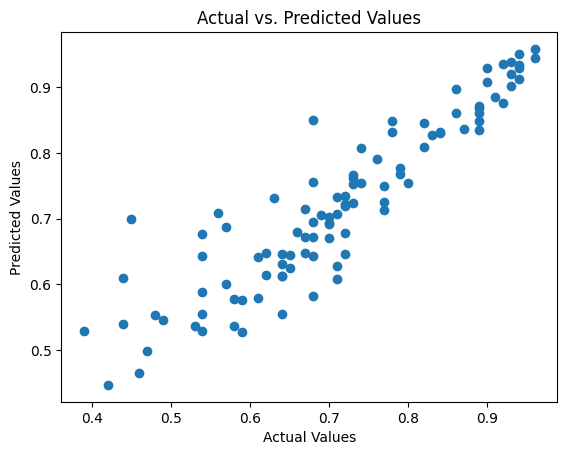

In [ ]:

# Initialize the model
model = linear_model.Lasso(alpha=0.001)
model_scaled = LinearRegression()


# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)




plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()




#SGD Model

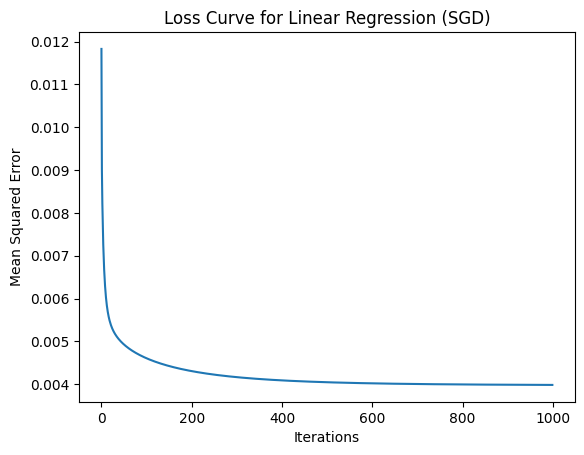

Mean squared error: 0.003984487165664444
R squared Value: 0.8317625704673492


In [46]:

from sklearn.linear_model import SGDRegressor
import numpy as np

# Initialize the SGDRegressor with 'loss' set to 'squared_loss' for linear regression
sgd_model = SGDRegressor(loss='squared_error', random_state=42)

# Training parameters
epochs = 1000
learning_rate = 0.01

# Lists to store iteration and loss values
iterations = []
losses = []

# Manual training loop
for epoch in range(epochs):
    sgd_model.partial_fit(X_train_scaled, y_train)

    # Calculate loss at each iteration
    y_pred = sgd_model.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_pred)

    # Append iteration and loss values to lists
    iterations.append(epoch)
    losses.append(mse)



# Plot the loss curve
plt.plot(iterations, losses)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Linear Regression (SGD)')
plt.show()


y_pred = sgd_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R squared Value:", r2)

In [45]:
y_head,x_head = y_test[:10],X_test[:10]
y_head.values


array([0.93, 0.84, 0.39, 0.77, 0.74, 0.89, 0.47, 0.57, 0.68, 0.82])

In [43]:
y_pred_head = model.predict(x_head)
np.round(y_pred_head,2)

array([0.91, 0.83, 0.53, 0.71, 0.81, 0.86, 0.5 , 0.68, 0.85, 0.81])

In [44]:

y_pred_scaled_head = model_scaled.predict(x_head)
np.round(y_pred_head,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([0.91, 0.83, 0.53, 0.71, 0.81, 0.86, 0.5 , 0.68, 0.85, 0.81])